# Background considering the photopeak
gross area = $10064$ \
net area = $7241 \pm 328$ 

In [146]:
net_background = 7241 
net_error = 328
gross_background = 90587 * (58.68/164.60)

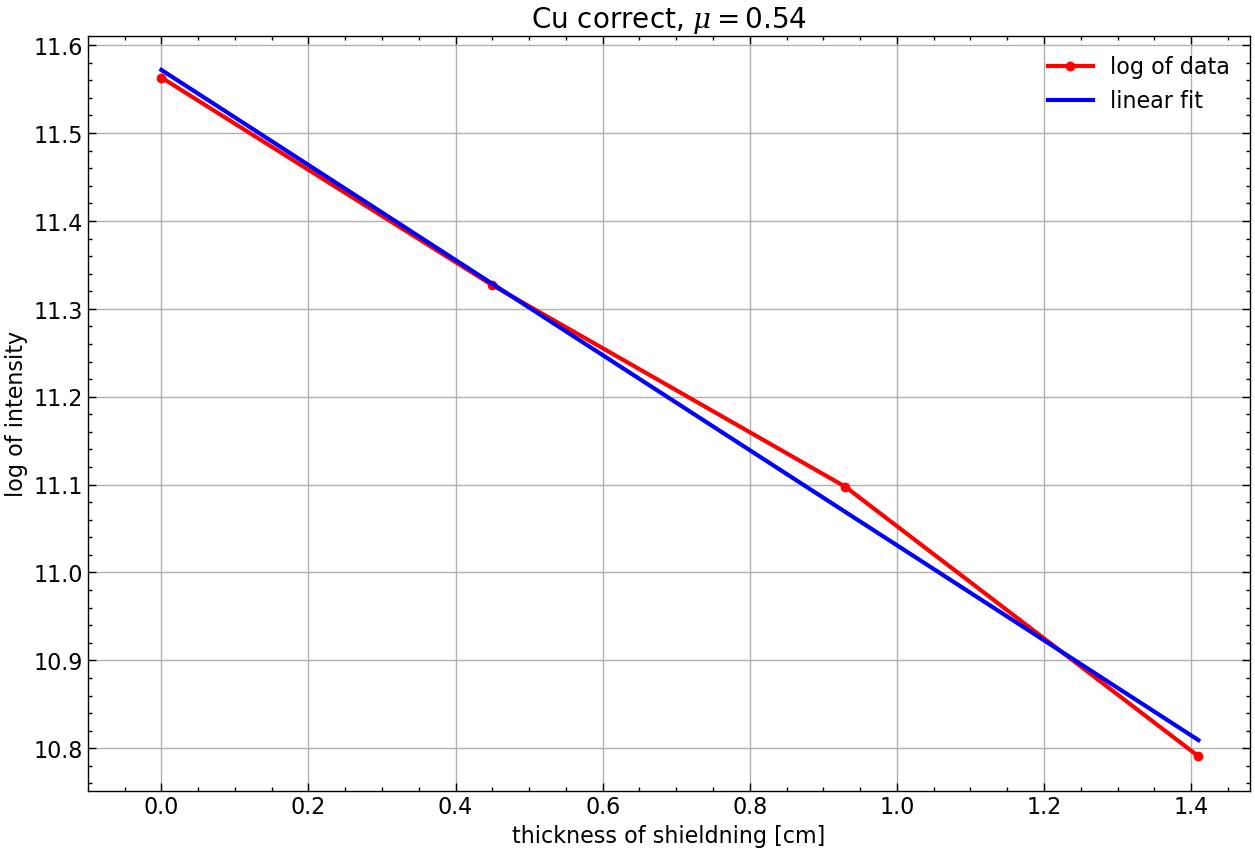

In [145]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15, 10)


name = "Cu correct" # "Pb correct" "Cu incorrect" "Cu correct"
data = pd.read_csv("../NuclearPhysicsLab/" + name + ".txt")

# wierd data points in the end
if name == "Cu correct":
    data = data[:-2]

x_k, A_k, error_k, t_k = data.keys()
x = data[x_k].to_numpy().cumsum() / 10 # in cm

if "incorrect" in name:
    A = data[A_k].to_numpy() - gross_background
else: 
    A = data[A_k].to_numpy() - net_background
    
logA = np.log(A)
error = data[error_k].to_numpy()
t = data[t_k].to_numpy()
slope, intercept, r, p, std_err = stats.linregress(x, logA)

plt.title(name + f", $\mu = ${-slope.round(2)}", fontsize=20)
plt.plot(x, logA, "-ro", label="log of data")
plt.plot(x, slope*x + intercept, "b", label="linear fit")
# plt.plot(x, A, "r-o") # plot for the true copper with wierd values
plt.xlabel("thickness of shieldning [cm]"), plt.ylabel("log of intensity")
plt.xlim(-0.1)
plt.legend()
plt.grid()

if name == "Cu correct"
    plt.savefig(name + " modified" + ".png") 

else:
    plt.savefig(name + ".png")

In [130]:
name = "correct"
if "incorrect" in name: 
    print("ok")

In [66]:
import csv

# Open the CSV file and read the contents
with open("../NuclearPhysicsLab/" + name + ".txt", 'r') as f:
    reader = csv.reader(f)
    rows = list(reader)

# Convert the rows to a LaTeX table
table = '\\begin{tabular}{' + ('c' * len(rows[0])) + '}\n'
for row in rows:
    table += ' & '.join(row) + ' \\' + " \n "


In [67]:
table

'\\begin{tabular}{cccc}\nthickness (mm) & Net area & error & live time \\ \n 0 &  112393 &  891 &  50.72 \\ \n 5.0 &  73246 &  646 &  54.00 \\ \n 5.0 &  46780 &  505 &  55.82 \\ \n 5.0 &  30237 &  399 &  56.88 \\ \n 4.8 &  19967 &  337 &  57.52 \\ \n 5.0 &  14319 &  289 &  57.88 \\ \n '